In [8]:
!conda install xlrd -y #needed for pd.read_excel

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::ipywidgets==7.6.3=pyhd3deb0d_0
  - conda-forge/osx-64::widgetsnbextension==3.5.1=py39h6e9494a_4
  - conda-forge/noarch::ipympl==0.7.0=pyhd8ed1ab_0
  - conda-forge/osx-64::ipykernel==5.5.3=py39h71a6800_0
  - conda-forge/osx-64::ipython==7.22.0=py39h71a6800_0
  - conda-forge/osx-64::notebook==6.3.0=py39h6e9494a_0
  - conda-forge/noarch::jupyterlab==3.0.12=pyhd8ed1ab_0
  - conda-forge/noarch::nbclassic==0.2.6=pyhd8ed1ab_0
  - conda-forge/osx-64::rise==5.7.1=py39h6e9494a_0
done

## Package Plan ##

  environment location: /Users/seanreed1/miniconda

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    decorator-5.0.9            |     pyhd8ed1ab_0          11 KB  conda-forge
    xlrd-2.0

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from src.split_data import statmodels_split

In [30]:
titanic = pd.read_excel("https://hbiostat.org/data/repo/titanic3.xls")

In [12]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

## Discussion: if I want to make a logistic regression model to predict the survivors of the titanic, which columns should I drop??

In [13]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
### 'boat' should be dropped (why?)
### 'body' should be dropped (why?)

In [16]:
titanic.drop(['boat', 'body'], axis='columns')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN


In [ ]:
### Survived is our target column. This is what we are trying to predict

In [17]:
# let's look at missing values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
# we are missing a fair amount of ages of the passengers, can we figure out a way to impute them? 
# was being young a factor in survival?

In [19]:
titanic['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [24]:
titanic['pclass'].nunique(), titanic['pclass'].unique()

(3, array([1, 2, 3]))

In [25]:
titanic['sibsp'].nunique(), titanic['sibsp'].unique()

(7, array([0, 1, 2, 3, 4, 5, 8]))

In [27]:
titanic['parch'].nunique(), titanic['parch'].unique()

(8, array([0, 2, 1, 4, 3, 5, 6, 9]))

In [29]:
titanic['ticket'].nunique(), titanic['ticket'].unique()

(939,
 array([24160, 113781, 19952, 13502, 112050, 11769, 'PC 17609', 'PC 17757',
        'PC 17477', 19877, 27042, 'PC 17318', 'PC 17558', 11813, 13050,
        11751, 111369, 'PC 17483', 13905, 11967, 'PC 17760', 110564,
        113784, 112277, 36928, 113783, 110489, 'PC 17608', 113505, 111427,
        113054, 'PC 17591', 112379, 'PC 17610', 16966, 113050, 113798,
        'PC 17476', 'PC 17606', 'PC 17755', 695, 113059, 113760, 19924,
        17770, 'W.E.P. 5734', 113806, 110152, 'PC 17594', 112051, 13508,
        110465, 5727, 'PC 17756', 11770, 113791, 'WE/P 5735', 112901,
        'PC 17599', 113055, 113804, 'F.C. 12750', 17474, 33638, 'PC 17761',
        11755, 'PC 17485', 'PC 17580', 11767, 36947, 'PC 17531',
        'PC 17598', '17421', 'PC 17474', '113051', '19950', '113778',
        'PC 17611', '17765', '13568', '13567', '112058', '113803',
        '111320', '113503', '112378', 'PC 17593', '17453', 'PC 17754',
        '113780', '112053', 'PC 17582', 'PC 17759', '11765', 'PC 17

In [21]:
titanic['home.dest'].unique(), titanic['home.dest'].nunique()

(array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON', 'New York, NY',
        'Hudson, NY', 'Belfast, NI', 'Bayside, Queens, NY',
        'Montevideo, Uruguay', 'Paris, France', nan, 'Hessle, Yorks',
        'Montreal, PQ', 'Winnipeg, MN', 'San Francisco, CA',
        'Dowagiac, MI', 'Stockholm, Sweden / Washington, DC',
        'Trenton, NJ', 'Glen Ridge, NJ', 'Youngstown, OH',
        'Birkdale, England Cleveland, Ohio', 'London / Winnipeg, MB',
        'Cooperstown, NY', 'St Leonards-on-Sea, England Ohio',
        'Los Angeles, CA', 'Pomeroy, WA', 'Omaha, NE', 'Philadelphia, PA',
        'Denver, CO', 'Belmont, MA', 'Washington, DC',
        'Austria-Hungary / Germantown, Philadelphia, PA',
        'Germantown, Philadelphia, PA', 'Bryn Mawr, PA',
        'Ascot, Berkshire / Rochester, NY', 'Little Onn Hall, Staffs',
        'Amenia, ND', 'New York, NY / Ithaca, NY', 'London, England',
        'Liverpool, England / Belfast', 'Stoughton, MA', 'Victoria, BC',
        'Lakewood, NJ

In [23]:
titanic['cabin'].nunique(), titanic['cabin'].unique()

(186,
 array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
        'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
        'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
        'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
        'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
        'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
        'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
        'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
        'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
        'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
        'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
        'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
        'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
        'C90', 'E38', 'C78', 'C30', 'C118', 'D

In [33]:
dropped = ['cabin', 'home.dest', 'ticket','boat', 'body']
df = titanic.drop(dropped, axis = 'columns')
df

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,7.2250,C


## Summary: We can try to investigate sibsp, parch, fare, embarked, and pclass as possible variables

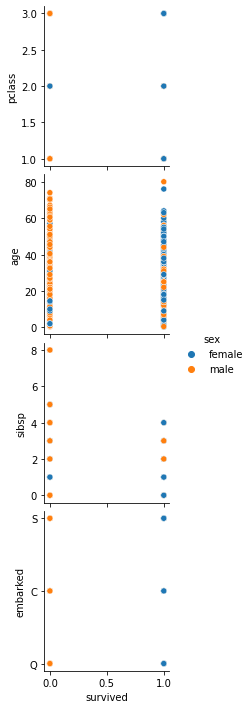

In [40]:
sns.pairplot(df, y_vars=['pclass', 'age', 'sibsp', 'embarked'], x_vars=['survived'], hue='sex')

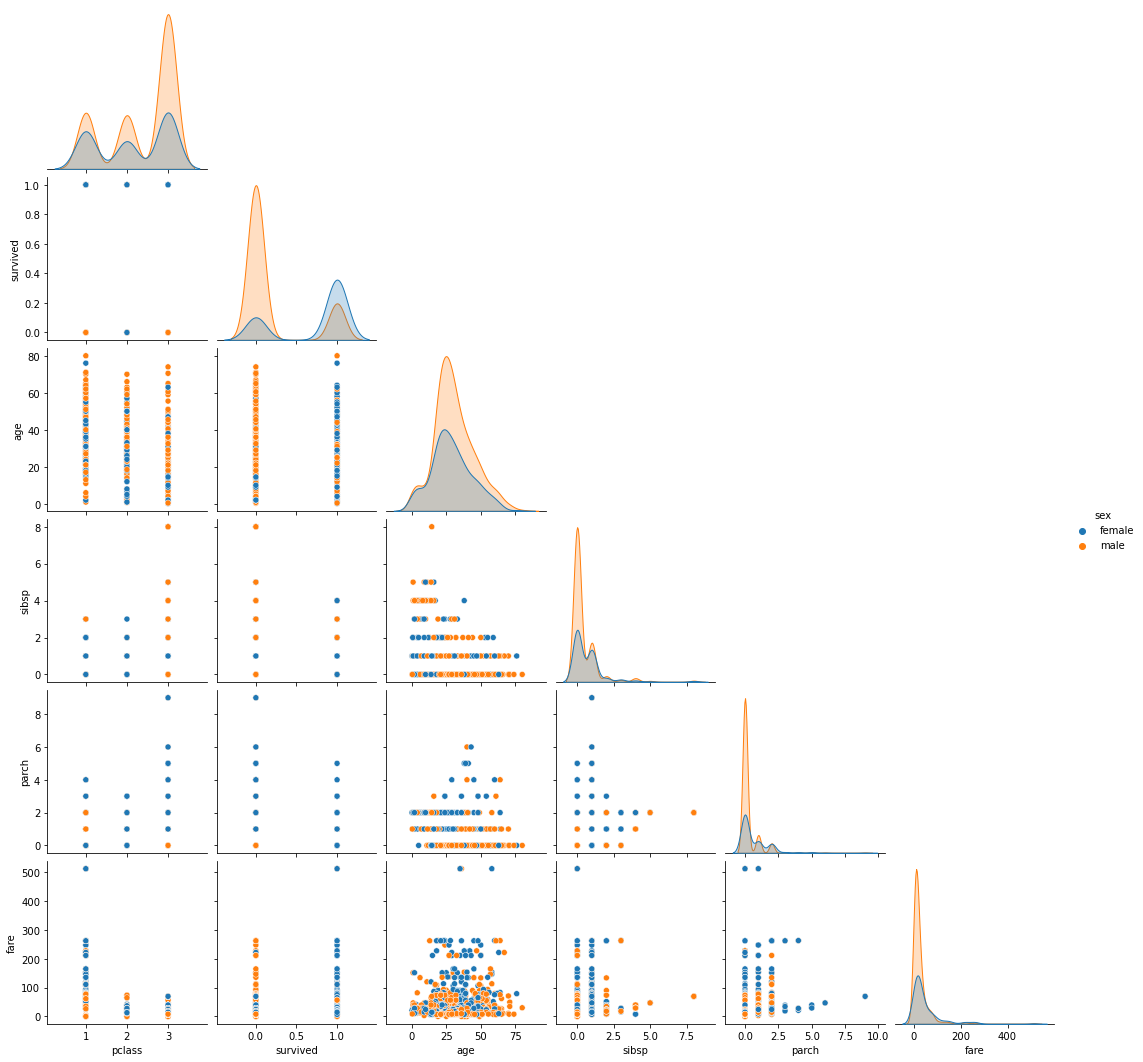

In [42]:
sns.pairplot(df, hue='sex', corner=True)

## Which are the interesting plots worth investigating at full size of the ones above??

<AxesSubplot:xlabel='fare', ylabel='survived'>

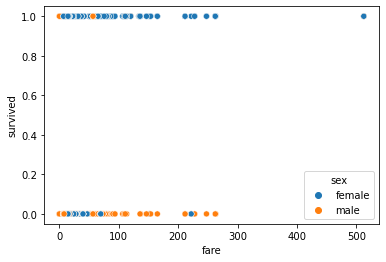

In [45]:
sns.scatterplot(x='fare', y='survived', hue='sex', data=df)

<AxesSubplot:xlabel='survived', ylabel='fare'>

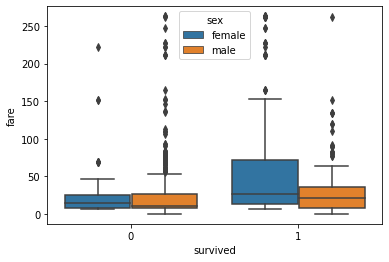

In [56]:
sns.boxplot(y='fare', x='survived', hue='sex', data=df[df.fare < 300])

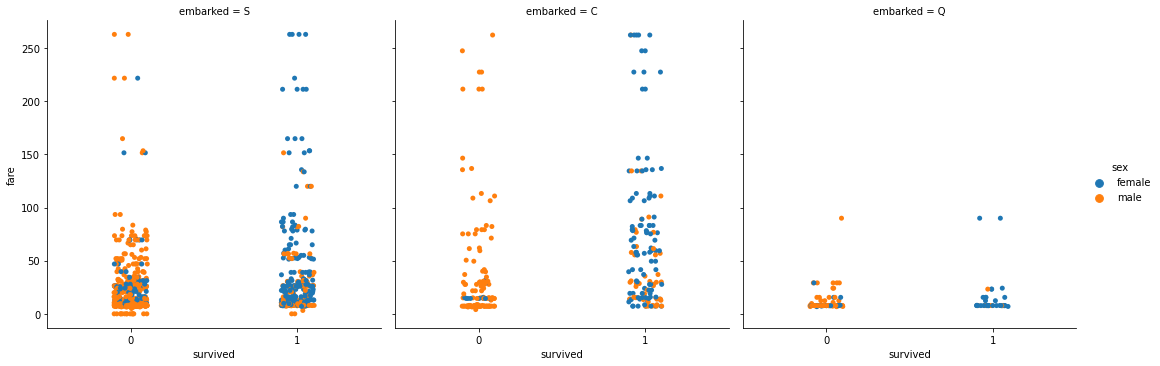

In [55]:
sns.catplot(y='fare', x='survived', hue='sex', col='embarked', data=df[df.fare < 300])

<AxesSubplot:xlabel='survived', ylabel='fare'>

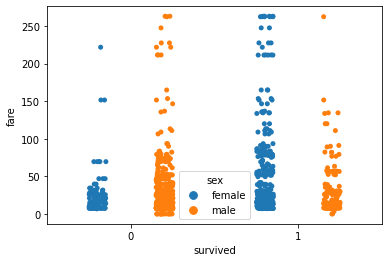

In [60]:
sns.stripplot(y='fare', x='survived', hue='sex', dodge=True, data=df[df.fare < 300])

<AxesSubplot:xlabel='survived', ylabel='fare'>

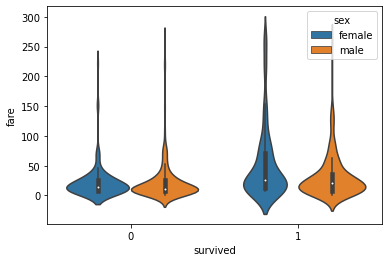

In [61]:
sns.violinplot(y='fare', x='survived', hue='sex', dodge=True, data=df[df.fare < 300])

<AxesSubplot:xlabel='survived', ylabel='fare'>

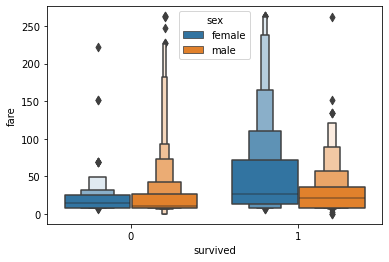

In [62]:
sns.boxenplot(y='fare', x='survived', hue='sex', dodge=True, data=df[df.fare < 300])

<AxesSubplot:xlabel='embarked', ylabel='count'>

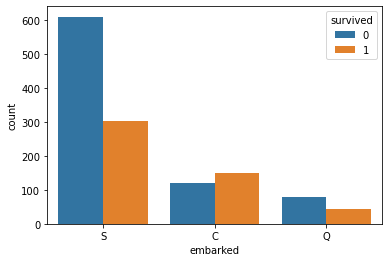

In [67]:
sns.countplot(x='embarked', hue='survived', data=df)